<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Forcasting(Airline%2BData)Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    96
dtype: int64

In [ ]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
data.corr()

,Passengers
Passengers,1.0


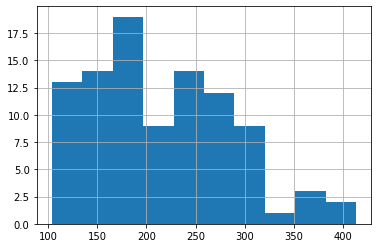

In [ ]:
plt.hist(data["Passengers"])
plt.grid("dark")
plt.show()

In [ ]:
data["Passengers"].agg(["var","median","skew","kurtosis"])

var         5172.229825
median       200.000000
skew           0.637375
kurtosis      -0.128121
Name: Passengers, dtype: float64

In [ ]:
# _converting Month column into to_datetime format_
data["Month"] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


#Time serise analysis


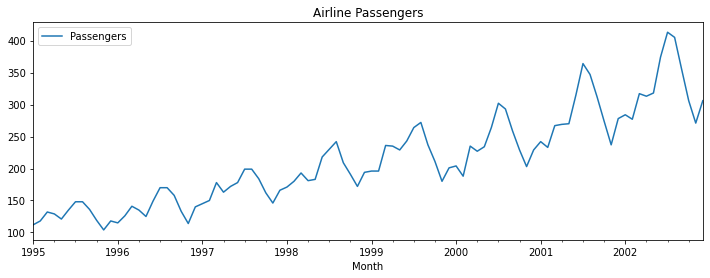

In [ ]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passengers')
plt.show(block=False)

_**Oservation**:- Their is no missing values in data_



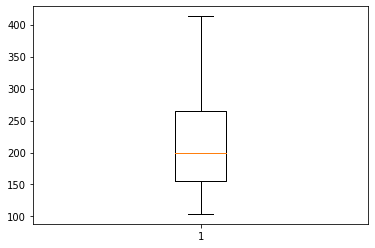

In [ ]:
# Outlier dictection
plt.boxplot(data['Passengers'])
plt.show()

_**Obsevartion**:- their is no outliers in data_

# **Time series Decompositon**

Additive seasonal decomposition

<Figure size 864x864 with 0 Axes>

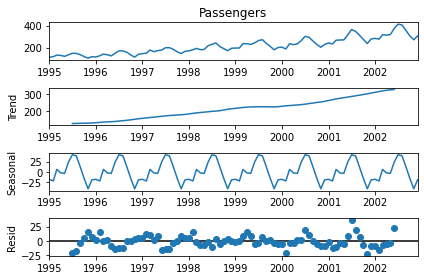

In [ ]:
plt.figure(figsize=(12,12))
import pylab
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') #additive seasonal index
fig = decomposition.plot()
plt.show()

<Figure size 864x864 with 0 Axes>

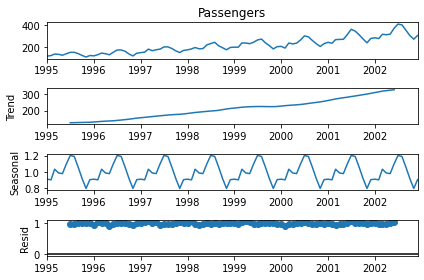

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') #multiplicative seasonal index
plt.figure(figsize=(12,12))
decomposition.plot()
plt.show()

#Sampling the data into - **Upsampling**

In [ ]:
upsample = data.resample('Q').mean()# data transfard into quater's
upsample.head()

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333


In [ ]:
upsample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1995-03-31 to 2002-12-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


#**Building and evaluate time series forcasting**

* Spliting time series data into train_test

In [ ]:
#Spliting data
train_len = 80
train = data.iloc[:train_len]
test = data.iloc[train_len:]

In [ ]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-04-01,269
2001-05-01,270
2001-06-01,315


In [ ]:
test

,Passengers
Month,
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318


# Sample time series methods or Basic Forcast model
## Navi method

In [ ]:
y_hat_naive = test.copy()
y_hat_naive['naive_forcast'] = train['Passengers'][train_len-1]

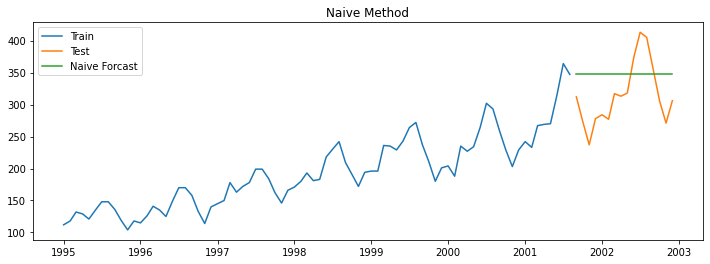

In [ ]:
# Ploting train,test and forcasting
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test') 
plt.plot(y_hat_naive['naive_forcast'],label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

 caculating RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forcast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forcast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54


# Simple Average method

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forcast'] = train['Passengers'].mean()


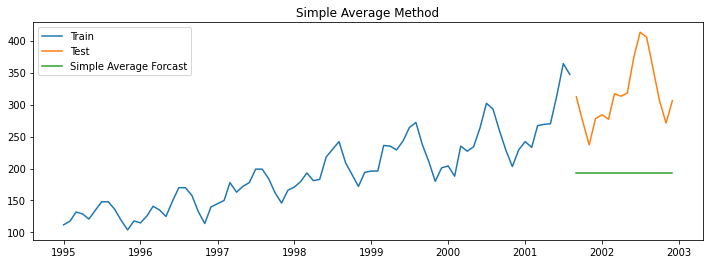

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test') 
plt.plot(y_hat_avg['avg_forcast'],label='Simple Average Forcast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

calculating RMSE AND MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forcast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forcast'])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,tempresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25


_Oservation:- here we can see by using average method our RMSE got incresed by 130.58_

# Simple moving average method 

In [ ]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


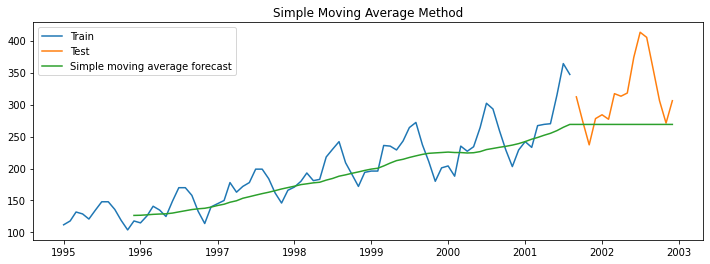

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test') 
plt.plot(y_hat_sma['sma_forecast'],label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

caculating RMSE and MAPE



In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

smaresults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,smaresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45


_Observation:- in this method MAPE drop down to 14.45% whish is better than first two method_

#Simple exponential smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


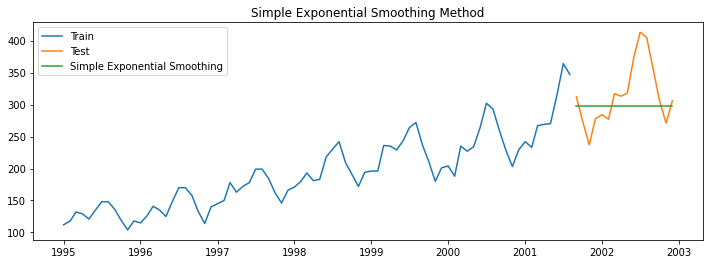

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test') 
plt.plot(y_hat_ses['ses_forecast'],label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

calculating RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

sesresults = pd.DataFrame({'Method':['Simple Exponential Smoothing Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,sesresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38


#Holt Winter's multiplicative method with trend and seasonality

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hum = test.copy()
y_hat_hum['hum_forecast'] = model_fit.forecast(16)

{'smoothing_level': 0.7010061813767804, 'smoothing_trend': 7.80548640521411e-12, 'smoothing_seasonal': 2.039727641053505e-12, 'damping_trend': nan, 'initial_level': 135.658415123756, 'initial_trend': 2.336526904146315, 'initial_seasons': array([0.81965309, 0.8061872 , 0.92801617, 0.89315653, 0.88336198,
       0.98451213, 1.09225402, 1.07194077, 0.94488139, 0.82692237,
       0.71887652, 0.80765255]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


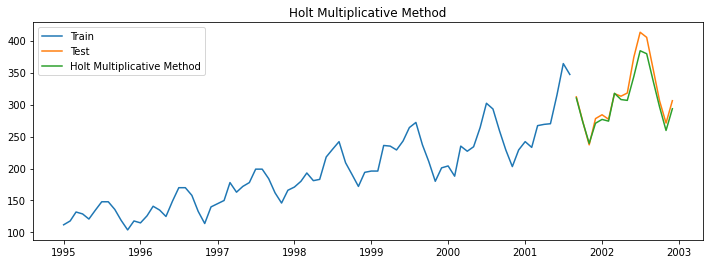

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test') 
plt.plot(y_hat_hum['hum_forecast'],label='Holt Multiplicative Method')
plt.legend(loc='best')
plt.title('Holt Multiplicative Method')
plt.show()

calculating RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hum['hum_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hum['hum_forecast'])/test['Passengers'])*100,2)

hwresults = pd.DataFrame({'Method':['Holt Mutiplicative Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,hwresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38
0,Holt Mutiplicative Method,14.57,3.22


_**Observation:-** As we can see in holt's multiplicative method we are getting best results, our MAPE rate came down to 3.22%_

#ARIMA and SARIMA

> Autoregressive Integrated Moving Average

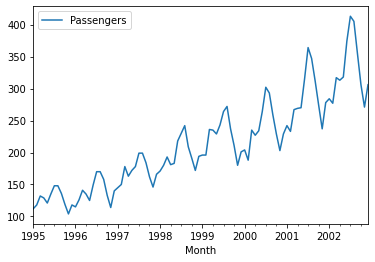

In [ ]:
data.plot()

ADF - Augmented dickey-fuller test

In [ ]:
# testing for stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 1.340248
Critical Values @ 0.05: -2.90
p-value: 0.996825


we are accepting the null hypothesis which means our time series has no stationary we have to make it stationary



- Box Cox transforme to make variance constant

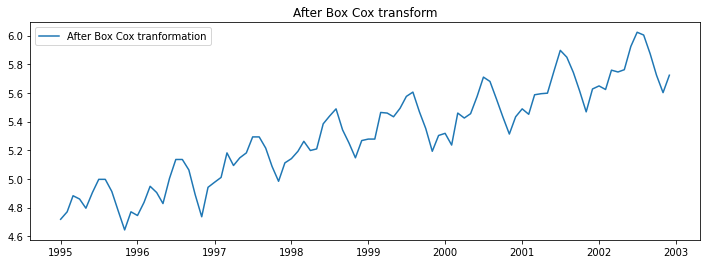

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

- Difference removeing trend

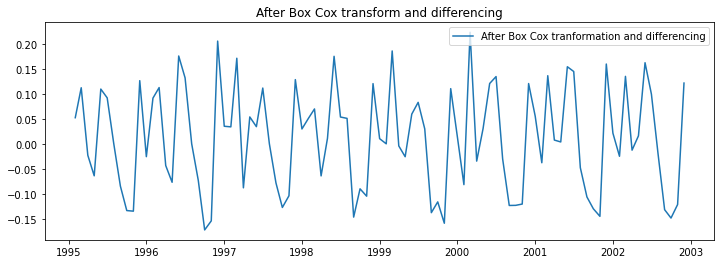

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [ ]:
data_boxcox_diff.dropna(inplace=True)

In [ ]:
data_boxcox_diff.tail()

Month
2002-08-01   -0.019561
2002-09-01   -0.131769
2002-10-01   -0.148533
2002-11-01   -0.121466
2002-12-01    0.121466
dtype: float64

Cheacking ADF after removing differnce trend

In [ ]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.670823
Critical Values @ 0.05: -2.90
p-value: 0.079225


## Autocorrelation function (ACF)



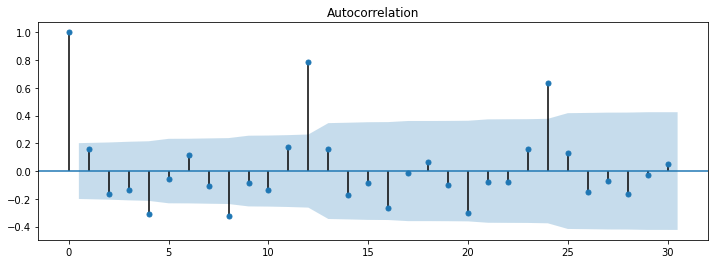

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

#Pairtal Autocorrelation funtion

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


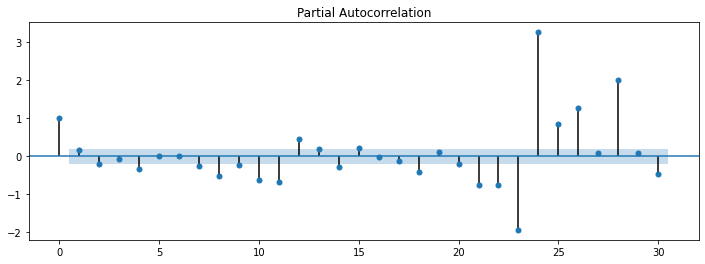

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [ ]:
train_data_boxcox_diff

Month
1995-02-01    0.052186
1995-03-01    0.112117
1995-04-01   -0.022990
1995-05-01   -0.064022
1995-06-01    0.109484
                ...   
2001-04-01    0.007463
2001-05-01    0.003711
2001-06-01    0.154151
2001-07-01    0.144581
2001-08-01   -0.047829
Length: 79, dtype: float64

Autoregration method

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38
0,Holt Mutiplicative Method,14.57,3.22
0,Autoregressive (AR) method,87.61,26.56


Moving Average Method

In [ ]:
from statsmodels. tsa.arima_model import ARIMA
model_ma = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model_ma.fit()
print(model_fit.params)

const      0.014173
ma.L1.y    0.181769
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38
0,Holt Mutiplicative Method,14.57,3.22
0,Autoregressive (AR) method,87.61,26.56
0,Moving Average (MA) method,84.74,25.60


Autoregression and moving average (ARMA)

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

const      0.014520
ar.L1.y   -0.906932
ma.L1.y    1.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][train_len-1:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38
0,Holt Mutiplicative Method,14.57,3.22
0,Autoregressive (AR) method,87.61,26.56
0,Moving Average (MA) method,84.74,25.60
0,Autoregressive moving average (ARMA) method,95.29,29.08


Auto regression integrated moving average (ARIMA)

In [ ]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

const        0.014520
ar.L1.D.y   -0.906932
ma.L1.D.y    1.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38
0,Holt Mutiplicative Method,14.57,3.22
0,Autoregressive (AR) method,87.61,26.56
0,Moving Average (MA) method,84.74,25.60
0,Autoregressive moving average (ARMA) method,95.29,29.08
0,Autoregressive integrated moving average (ARIM...,95.29,29.08


## Seasonal auto regressive integrated moving average (SARIMA)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1       0.243468
ma.L1      -0.617620
ar.S.L12   -0.097995
ma.S.L12   -0.524636
sigma2      0.001789
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,57.46,17.54
0,Simple Average Method,130.58,37.25
0,Simple Moving Average Method,66.35,14.45
0,Simple Exponential Smoothing Method,50.86,11.38
0,Holt Mutiplicative Method,14.57,3.22
0,Autoregressive (AR) method,87.61,26.56
0,Moving Average (MA) method,84.74,25.60
0,Autoregressive moving average (ARMA) method,95.29,29.08
0,Autoregressive integrated moving average (ARIM...,95.29,29.08
0,Seasonal autoregressive integrated moving aver...,6.09,1.53


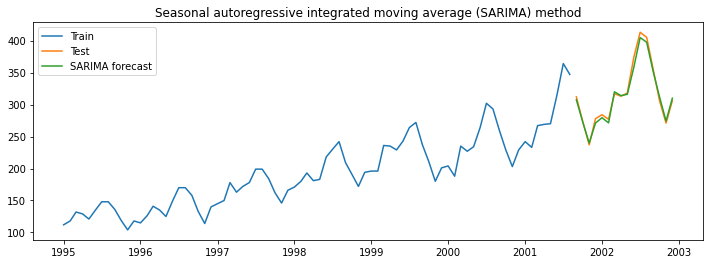

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

*SARIMA is giving us acurat results as we can see in above graph*